# **CC66H - Aprendizaje de Máquinas y Deep Learning**

## **Predicción de riesgo de diabetes en etapas tempranas**

En esta tarea vas a desarrollar un modelo de aprendizaje que sea capaz de
determinar si una persona tiene riesgo de paceder diabetes en un futuro. Los
datos han sido coleccionados a través de encuestas a pacientes en el Sylhet
Diabetes Hospital en Bangladesh. Los datos han sido curados y verificados por
profesionales de la salud, por lo que son confiables para crear un modelo de
aprendizaje.

Primero vamos a importar los paquetes necesarios para trabajar en estos datos.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

print(tf.__version__)

2.16.1


## **Descarga de archivo de datos**

Los datos están disponibles en un archivo CSV que contiene 520 muestras de 17
atributos. Los atributos son:

- Age: numérico
- Género: \[Male, Female\]
- Polyuria
- Polydipsia
- sudden weight loss
- weakness
- Polyphagia
- Genital thrush
- visual blurring
- Itching
- Irritability
- delayed healing
- partial paresis
- muscle stiffness
- Alopecia
- Obesity
- Class: \[Positive, Negative\]

Todos los atributos descritos sin valores tienen el conjunto \[Yes, No\].

En la siguiente celda de código, descargamos el archivo y lo leemos con Pandas.
Finalmente, visualizamos algunos datos del conjunto.


In [2]:
dataset_path = "./diabetes_data_upload.csv"

column_names = [
    "Age",
    "Gender",
    "Polyuria",
    "Polydipsia",
    "sudden weight loss",
    "weakness",
    "Polyphagia",
    "Genital thrush",
    "visual blurring",
    "Itching",
    "Irritability",
    "delayed healing",
    "partial paresis",
    "muscle stiffness",
    "Alopecia",
    "Obesity",
    "class",
]
raw_dataset = pd.read_csv(
    dataset_path,
    names=column_names,
    na_values="?",
    comment="\t",
    sep=",",
    skipinitialspace=True,
    header=1,
)

df = raw_dataset.copy()
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
1,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
2,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
3,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
4,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive


In [3]:
df.columns[2:-1]

Index(['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

# **Pre-procesamiento del conjunto de datos**

El conjunto de datos es variado. El atributo "Age" es el único atributo
numérico. Todos los demás atributos son nominales. Para procesar los datos
nominales en una red neuronal, es mejor convertirlos a una representación
numérica. En el siguiente ejemplo transformamos el atributo "Gender" con valores
nominales "Female" y "Male" a valores 1.0 y 0.0, respectivamente.

Del mismo modo, cambiamos los valores nominales del atributo "class" a 0.0 y
1.0. Como parte de la tarea debes procesar el resto de atributos nominales para
convertirlos a valores numéricos.


In [4]:
## [T1] INSERTA TU CÓDIGO AQUÍ PARA CONVERTIR LOS ATRIBUTOS NOMINALES A NUMÉRICOS
df.columns = [col.lower() for col in df.columns]
df

,age,gender,polyuria,polydipsia,sudden weight loss,weakness,polyphagia,genital thrush,visual blurring,itching,irritability,delayed healing,partial paresis,muscle stiffness,alopecia,obesity,class
0,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
1,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
2,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
3,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
4,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
515,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
516,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
517,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [5]:
df["gender"] = (df["gender"] == "Female") * 1.0
df["class"] = (df["class"] == "Positive") * 1.0

str_to_num = df.columns[2:-1]

for column in str_to_num:
    df[column] = (df[column] == "Yes") * 1.0

# Prueba mostrando parte de la data para ver si tu conversión se hizo correctamente
df.head()

,age,gender,polyuria,polydipsia,sudden weight loss,weakness,polyphagia,genital thrush,visual blurring,itching,irritability,delayed healing,partial paresis,muscle stiffness,alopecia,obesity,class
0,58,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,41,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
2,45,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,60,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,55,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [6]:
# df['class_one_hot'] = list(keras.utils.to_categorical(df['class']))
# df.iloc[200]

Ahora dividimos la data en conjunto de entrenamiento y conjunto de test. Esta
división es siempre necesaria para poder probar si tu modelo de aprendizaje ha
aprendido a generalizar con datos que no pertenecen al conjunto de
entrenamiento.


In [7]:
# 80% de datos para train y 20% de datos para test
X_train = df.sample(frac=0.8, random_state=0)
X_test = df.drop(X_train.index)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

X_train

,age,gender,polyuria,polydipsia,sudden weight loss,weakness,polyphagia,genital thrush,visual blurring,itching,irritability,delayed healing,partial paresis,muscle stiffness,alopecia,obesity,class
0,67,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,25,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,60,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,52,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,35,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,49,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
411,40,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
412,28,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
413,46,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0


Las etiquetas están en el atributo "class" de los datos, es mejor separarlos de
los datos, así podemos usarlos para el entrenamiento.


In [8]:
y_train = keras.utils.to_categorical(X_train["class"], 2)
y_test = keras.utils.to_categorical(X_test["class"], 2)

X_train.drop("class", axis=1, inplace=True)
X_test.drop("class", axis=1, inplace=True)

X_train

,age,gender,polyuria,polydipsia,sudden weight loss,weakness,polyphagia,genital thrush,visual blurring,itching,irritability,delayed healing,partial paresis,muscle stiffness,alopecia,obesity
0,67,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
1,25,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,60,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,52,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,35,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,49,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
411,40,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
412,28,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
413,46,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


# **Normalización de los datos**

Los atributos nominales que procesamos ya están en un rango entre 0.0 y 1.0. Sin
embargo, el atributo "Age" tiene valores numéricos en un rango distinto. Como
parte de la tarea, averigua cómo puedes normalizar el atributo "Age".

**Sugerencia:** Modifica sólo la columna del dataframe de Pandas, dividiéndola
entre la máxima edad posible, de esa forma las edades estarán en el intervalo
\[0,1\].


In [9]:
# np.max(X_train['age'])
# np.max(X_test['age'])
# max(np.max(X_train['age']), np.max(X_test['age']))

In [10]:
## [T1] Agrega tu código de normalización del atributo "Age" aquí

# Obtener el máximo entre la data de entrenamiento y de test en caso de que el split
# resulte en un valor máximo distinto entre los dos subsets. De esta forma aseguramos
# que la normalización es la misma para ambos.
max_age = max(np.max(X_train["age"]), np.max(X_test["age"]))

X_train["age"] = X_train["age"] / max_age
X_test["age"] = X_test["age"] / max_age

X_train

,age,gender,polyuria,polydipsia,sudden weight loss,weakness,polyphagia,genital thrush,visual blurring,itching,irritability,delayed healing,partial paresis,muscle stiffness,alopecia,obesity
0,0.744444,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.277778,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.666667,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.577778,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.388889,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,0.544444,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
411,0.444444,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
412,0.311111,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
413,0.511111,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


# **Creación de la red neuronal**

Ahora construimos la red neuronal en la siguiente función:


In [11]:
def build_model():
    ## [T1] Agrega las capas de tu red aqui

    # Algunos comentarios sobre el diseño de la red:
    # 1. Usamos la API funcional de Keras
    # 2. Definimos un input de 16, uno por cada variable del dataset
    # 3. La capa de salida tiene un output de 2 neuronas y activación softmax para obtener
    #    la probabilidad de que cada predicción pertenezca a la clase positiva o negativa de
    #    diagnóstico de cáncer
    # x = layers.Dropout(0.45)(x)
    inputs = keras.Input(shape=(16,))
    x = layers.Dense(16, activation="relu")(inputs)
    x = layers.Dense(4, activation="relu")(x)
    outputs = layers.Dense(2, activation="softmax", name="predictions")(x)

    model = keras.Model(inputs=inputs, outputs=outputs)

    ## [T1] LLama a la función "compile" y retornas la variable "model"
    ## Qué función de "loss" usarías?
    ## Respuesta: la función de loss categorical_crossentropy es la que permite representar el error
    ##            entre entre dos o más clases esperadas en representación one-hot.
    ##
    ## Qué método de optimización usarías?
    ## Respuesta: el optimizador Adam es elegido por ser bueno para predicciones multinoulli.
    model.compile(
        optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
    )

    return model


## Creamos una red neuronal y observamos su estructura
model = build_model()
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 2)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 350 (1.37 KB)

 Trainable params: 350 (1.37 KB)

 Non-trainable params: 0 (0.00 B)

Si tu red está creada correctamente, es posible ejecutar el siguiente código y
ver una respuesta. Aunque la predicción por ahora no tenga sentido, al menos
esto nos da una idea de que la red está operando.


In [12]:
example_batch = X_train[:10]
example_result = model.predict(example_batch)
example_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[0.76742446, 0.23257554],
       [0.5300937 , 0.46990624],
       [0.60879827, 0.3912018 ],
       [0.51326203, 0.48673797],
       [0.47150916, 0.52849084],
       [0.48239562, 0.5176044 ],
       [0.8010741 , 0.19892596],
       [0.48385483, 0.51614517],
       [0.45739654, 0.5426035 ],
       [0.47401458, 0.5259855 ]], dtype=float32)

# **Entrenamiento de la red neuronal**

Ahora estamos listos para entrenar la red. Haremos uso de callbacks para
implementar nuestra propia función que muestra el progreso del entrenamiento.
Debes darle un valor al número de EPOCAS y ejecutar el siguiente código para
entrenar.

La función "fit" está empleandpo el 20% de la data de entrenamiento como
conjunto de validación.


In [13]:
print(X_train.shape)
print(y_train.shape)

(415, 16)
(415, 2)


In [14]:
# Imprime un punto en cada época completada
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            print("")
        print(".", end="")


# [T1] Cambia el número de épocas
EPOCHS = 40

history = model.fit(
    X_train,
    y_train,
    epochs=EPOCHS,
    validation_split=0.2,
    verbose=0,
    callbacks=[PrintDot()],
)


........................................

# **Resultados del entrenamiento**

Convertimos el historial de entrenamiento en un dataset de Pandas y mostramos la
información de las últimas iteraciones (con el método "tail")


In [15]:
hist = pd.DataFrame(history.history)
hist["epoch"] = history.epoch
hist.tail()

,accuracy,loss,val_accuracy,val_loss,epoch
35,0.960843,0.151376,0.951807,0.148922,35
36,0.960843,0.148894,0.951807,0.147288,36
37,0.960843,0.145190,0.951807,0.144942,37
38,0.960843,0.142964,0.951807,0.143307,38
39,0.963855,0.139604,0.951807,0.141273,39


La siguiente función va a graficar "Loss" y "Accuracy" tanto para el conjunto de
entrenamiento, como para el conjunto de validación.

En este punto hay que observar y analizar los resultados. Deberíamos ser capaces
de responder las preguntas:

- Cuál es el mejor accuracy de validación?
- Existe un sobreajuste del modelo? Esto lo puedes observar en el comportamiento
  de las curvas de train y validación.

**Nota:** Si tu modelo no alcanza el 93% de accuracy de validación, qué podrías
cambiar para que el accuracy mejore? Repite los experimentos haciendo los
cambios que creas convenientes para hacer que el accuracy de validación supere
el 93%.


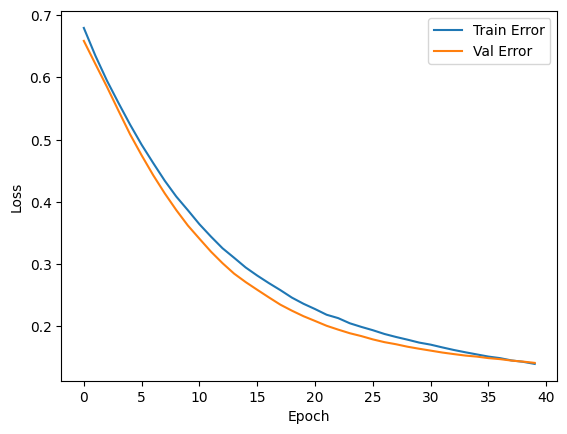

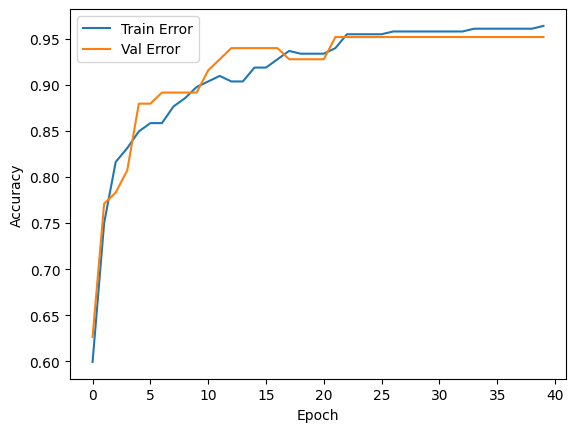

In [16]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist["epoch"] = history.epoch

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.plot(hist["epoch"], hist["loss"], label="Train Error")
    plt.plot(hist["epoch"], hist["val_loss"], label="Val Error")
    plt.legend()

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.plot(hist["epoch"], hist["accuracy"], label="Train Error")
    plt.plot(hist["epoch"], hist["val_accuracy"], label="Val Error")
    plt.legend()
    plt.show()


plot_history(history)

**Pruebas de test**

Note que el entrenamiento solo usa el conjunto de entrenamiento (del cual a su
vez se extrae el conjunto de validación). En este punto, como parte de la tarea,
predice los valores de salida del conjunto de test. Luego compara las etiquetas
obtenidas con las etiquetas deseadas y encuentra el porcentaje de datos de test
que se clasifican correctamente. Cuál es el accuracy final de test que logras
alcanzar?


In [17]:
## [T1] Implementa la predicción y cálculo de accuracy de test en esta celda


# Comparar las etiquetas obtenidas con las deseadas
def compare_predictions(predictions, actual_labels):
    return predictions == actual_labels


predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(y_test, axis=1)

comparison_vector = compare_predictions(predicted_classes, actual_classes)
correct_predictions = np.sum(comparison_vector)  # Suma la cantidad de True
print(f"comparison_vector: {comparison_vector}")
print(f"correct_predictions: {correct_predictions}/{predicted_classes.size}")

# Calcular el porcentaje de datos de test que se clasifican correctamente
print(
    f"correct_predictions_percentage: { round(correct_predictions / actual_classes.size * 100, 4) }%"
)

# Determinar cuál es el accuracy final de test que se logra alcanzar
print(history.history["val_accuracy"][-1])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step
comparison_vector: [ True False  True False  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
correct_predictions: 98/104
correct_predictions_percentage: 94.2308%
0.9518072009086609
